# Esercitazione 9

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtains the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before including crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

## Struttura del codice C++

Il codice è stato organizzato a classi: la prima è la classe Map(), che ha come data membri due matrici, una contenente le coordinate delle città, l'altra le distanze tra di esse. Viene passato con un parametro il metodo di calcolo delle distanze, $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$, e la disposizione delle città, in un quadrato o su una circonferenza. <br>
La classe Path() contiene i metodi per agire su un singolo percorso. Include la lunghezza del percorso, un metodo per calcolarla e un metodo per confrontare cammini diversi (operatore <). Sono inoltre inclusi 4 operatori che vengono poi usati per mutare la popolazione: Swap(), Shift(), Rotate(), Invert(). Tali operatori sono stati implementati usando la funzione Pbc, che fa in modo che, nel caso in cui l'indice considerato ecceda l'indice massimo del vettore, si possa proseguire comunque tornando all'inizio (indice 1, senza toccare la prima città). <br>

L'algoritmo genetico viene implementato nella classe Genetic(). Viene definito un operatore di selezione: estratto un numero uniformemente tra 0 e 1, si genera l'indice $j= int(M \times r^p)$ in modo che vengano estratti con maggiore probabilità i cammini con lunghezza minore. Per il parametro p è stato scelto il valore 4. Il metodo Mutate() muta un individuo, con probabilità del 5% per ogni mutazione possibile. I metodi Crossover() e Evolve() fanno avanzare la popolazione di una generazione: con una probabilità del 90%, vengono selezionati gli individui da far riprodurre secondo il metodo consigliato nella consegna. La progenie viene aggiunta alla popolazione iniziale, che viene poi ordinata e di cui viene presa la prima metà, ossia gli individui migliori. <br>

È stata utilizzata una popolazione di 300 individui, evoluta per 1500 generazioni. Si nota che si raggiunge rapidamente il minimo, già dopo circa 100 generazioni. È stato osservato che abbassando la probabilità delle mutazioni il tempo per raggiungere il minimo aumenta, a meno che non si incrementi la dimensione della popolazione: ciò accade a causa della poca diversità genetica fra gli individui. Aumentando la dimensione della popolazione  il numero di generazioni necessario a raggiungere il minimo diminuisce.

## Città su una circonferenza

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

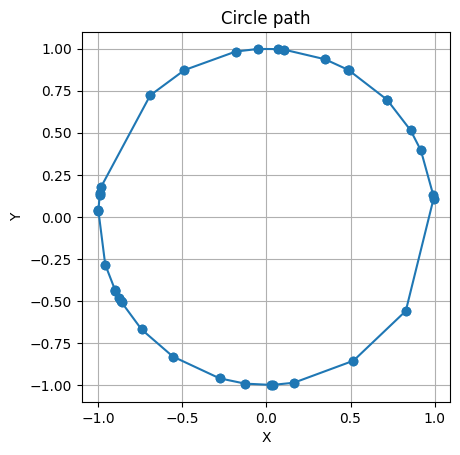

Shortest route:  6.24306


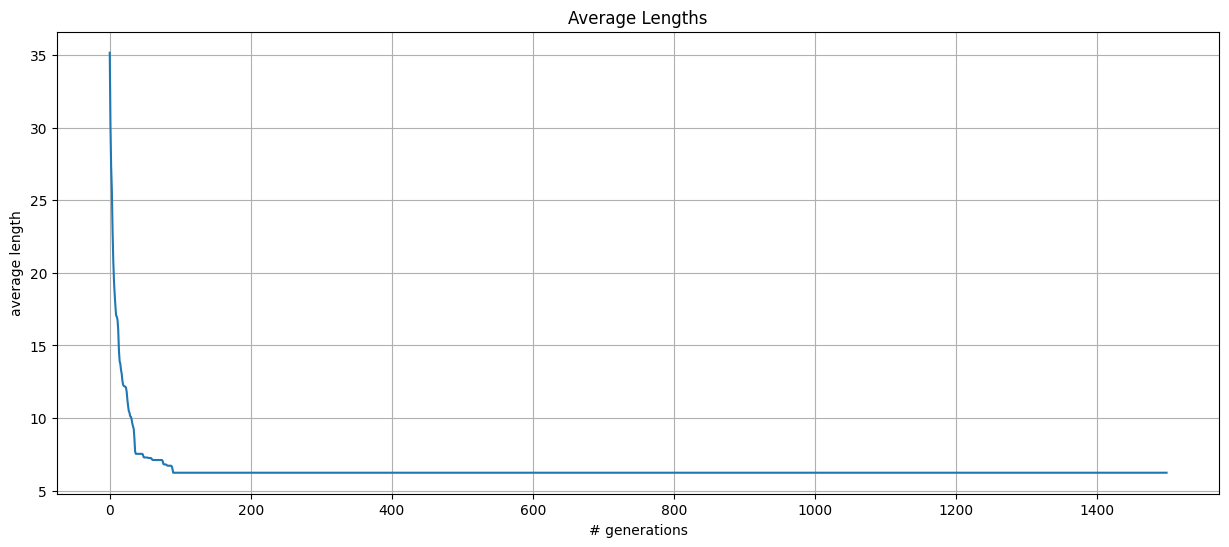

In [3]:
# Circle map coordinates
circlemap = np.loadtxt("Circle_map.out")
x_circle = circlemap[:, 0]
y_circle = circlemap[:, 1]

data_best = np.loadtxt("Cities_circle_L1.out")
indices = [int(index) for index in data_best[1:]]

# Create connected point pairs based on the order of indices
connected_points = [(x_circle[i], y_circle[i]) for i in indices]
connected_points.append((x_circle[indices[0]], y_circle[indices[0]]))

# Plot connected points
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x_circle, y_circle)
ax.plot(*zip(*connected_points), '-o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Circle path')
plt.grid(True)
plt.show()

print("Shortest route: ", data_best[0])

data=np.loadtxt("AverageLengths_circle.out")

plt.figure(figsize=(15,6))

plt.plot(data[:,0], data[:,1])
plt.xlabel("# generations")
plt.ylabel("average length")
plt.title("Average Lengths")
plt.grid(True)
plt.show()

## Città in un quadrato

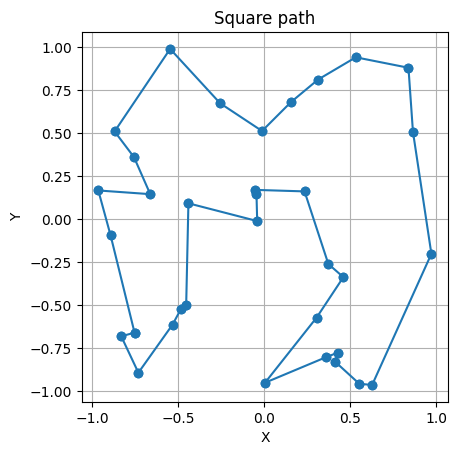

Shortest path:  10.1944


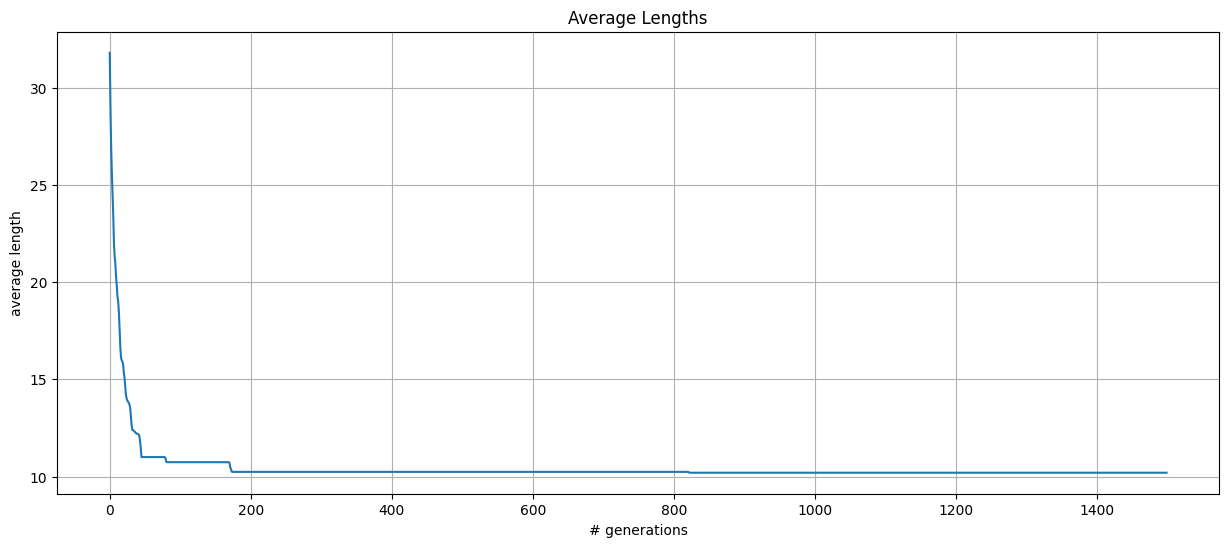

In [4]:
# Square map coordinates
squaremap = np.loadtxt("Square_map.out")
x_square = squaremap[:, 0]
y_square = squaremap[:, 1]

data_best = np.loadtxt("Cities_square_L1.out")
indices = [int(index) for index in data_best[1:]]

# Create connected point pairs based on the order of indices
connected_points = [(x_square[i], y_square[i]) for i in indices]
connected_points.append((x_square[indices[0]], y_square[indices[0]]))

# Plot connected points
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x_square, y_square)
ax.plot(*zip(*connected_points), '-o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Square path')
plt.grid(True)
plt.show()

print("Shortest path: ", data_best[0])

data=np.loadtxt("AverageLengths_square.out")

plt.figure(figsize=(15,6))

plt.plot(data[:,0], data[:,1])
plt.xlabel("# generations")
plt.ylabel("average length")
plt.title("Average Lengths")
plt.grid(True)
plt.show()